#### Load all the required libraries

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import cm
from mpl_toolkits.axes_grid1 import ImageGrid
import math
%matplotlib inline

Using TensorFlow backend.


#### Define helper function to plot images in grids

In [2]:
def show_grid(image_list,nrows,ncols,label_list=None,show_labels=False,savename=None,figsize=(10,10),showaxis='off'):
    if type(image_list) is not list:
        if(image_list.shape[-1]==1):
            image_list = [image_list[i,:,:,0] for i in range(image_list.shape[0])]
        elif(image_list.shape[-1]==3):
            image_list = [image_list[i,:,:,:] for i in range(image_list.shape[0])]
    fig = plt.figure(None, figsize,frameon=False)
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(nrows, ncols),  # creates 2x2 grid of axes
                     axes_pad=0.3,  # pad between axes in inch.
                     share_all=True,
                     )
    for i in range(nrows*ncols):
        ax = grid[i]
        ax.imshow(image_list[i],cmap='Greys_r')  # The AxesGrid object work as a list of axes.
        ax.axis('off')
        if show_labels:
            ax.set_title(class_mapping[y_int[i]])
    if savename != None:
        plt.savefig(savename,bbox_inches='tight')

#### Define the datagenerator

In [3]:
batch_size=32
datagen_args = dict(rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
                   rescale=1./255)
datagen = ImageDataGenerator(**datagen_args)
datagenerator = datagen.flow_from_directory('./Dataset/dtd/images',target_size=(128,128),
                                            batch_size=batch_size,interpolation="lanczos",shuffle=True)

Found 5640 images belonging to 47 classes.


In [16]:
print('Number of samples: ',datagenerator.samples)
print('Number of classes: ',len(datagenerator.class_indices))
print('Number of samples per class:', int(datagenerator.samples/len(datagenerator.class_indices)))

Number of samples:  5640
Number of classes:  47
Number of samples per class: 120


In [27]:
datagenerator.filenames[0:5]

['banded\\banded_0002.jpg',
 'banded\\banded_0004.jpg',
 'banded\\banded_0005.jpg',
 'banded\\banded_0006.jpg',
 'banded\\banded_0008.jpg']

In [7]:
print(datagenerator.class_indices)

{'banded': 0, 'blotchy': 1, 'braided': 2, 'bubbly': 3, 'bumpy': 4, 'chequered': 5, 'cobwebbed': 6, 'cracked': 7, 'crosshatched': 8, 'crystalline': 9, 'dotted': 10, 'fibrous': 11, 'flecked': 12, 'freckled': 13, 'frilly': 14, 'gauzy': 15, 'grid': 16, 'grooved': 17, 'honeycombed': 18, 'interlaced': 19, 'knitted': 20, 'lacelike': 21, 'lined': 22, 'marbled': 23, 'matted': 24, 'meshed': 25, 'paisley': 26, 'perforated': 27, 'pitted': 28, 'pleated': 29, 'polka-dotted': 30, 'porous': 31, 'potholed': 32, 'scaly': 33, 'smeared': 34, 'spiralled': 35, 'sprinkled': 36, 'stained': 37, 'stratified': 38, 'striped': 39, 'studded': 40, 'swirly': 41, 'veined': 42, 'waffled': 43, 'woven': 44, 'wrinkled': 45, 'zigzagged': 46}


In [7]:
class_mapping = {v:k for k,v in datagenerator.class_indices.items()}

In [4]:
x,y = next(datagenerator)
print('x: ',type(x))
print('y: ',type(y))
print('x: ',x.shape)
print('y: ',y.shape)

x:  <class 'numpy.ndarray'>
y:  <class 'numpy.ndarray'>
x:  (32, 128, 128, 3)
y:  (32, 47)


In [5]:
#Get class int vale from one hot encoded labels
y_int = np.argmax(y,axis=-1)

#### Visualize the batch of images

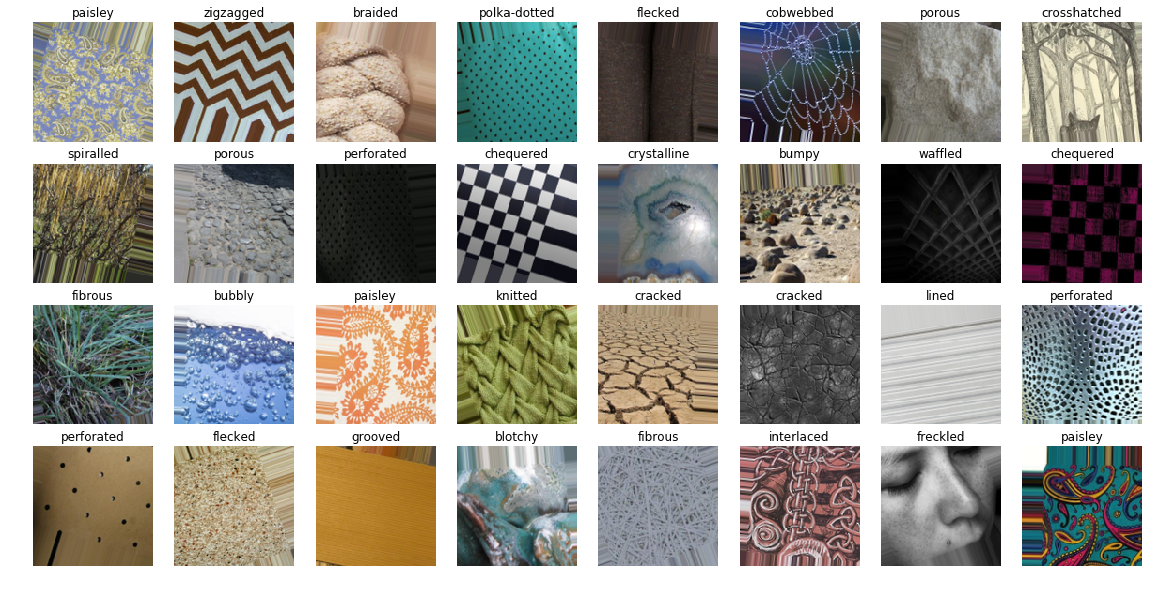

In [8]:
show_grid(x,4,8,label_list=y_int,show_labels=True,figsize=(20,10),savename='./Images/image_grid.png')

#### Visualizing batch images w.r.t. the original images

In [9]:
#Shuffle has been set to False
dgen_no_shuffle = datagen.flow_from_directory('./Dataset/dtd/images',target_size=(128,128),batch_size=32,interpolation="lanczos",shuffle=False)

Found 5640 images belonging to 47 classes.


In [10]:
dgen_no_shuffle.reset() #resets the generator to the first batch
for i in range(3):
    x1,y1 = next(dgen_no_shuffle)
    y1_int = np.argmax(y1,axis=-1)

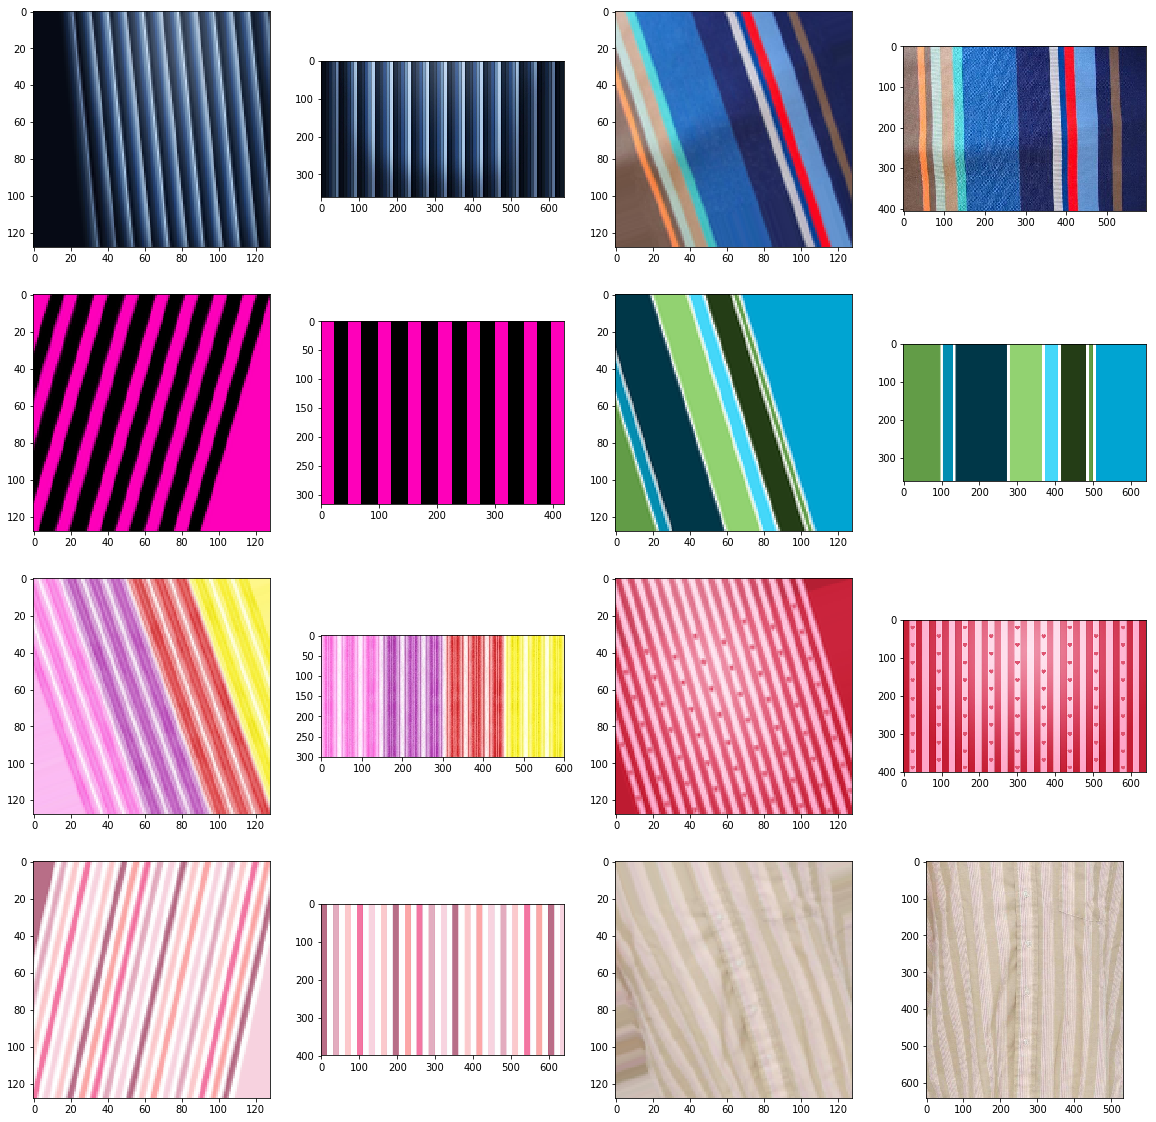

In [16]:
plt.figure(figsize=(20,20))
idx=1
for i in range(8):
    plt.subplot(4,4,idx)
    idx+=1
    plt.imshow(x1[i].reshape(128,128,3))
    plt.subplot(4,4,idx)
    plt.imshow(io.imread(os.path.join(dgen_no_shuffle.directory,dgen_no_shuffle.filenames[(dgen_no_shuffle.batch_index-1)*32+i])))
    idx+=1
plt.savefig('./Images/visual_original_comp.png',bbox_inches='tight')

#### Train using Image DataGenerator

In [ ]:
epochs = 25
hist = model.fit_generator(datagenerator, 
                           steps_per_epoch= math.ceil(datagenerator.samples//batch_size),
                           epochs=epochs, verbose=1)

#### Using DataGenerator to predict on test set

In [ ]:
#This ensures you start from first batch. 
#And the datagen shuffle is set to False. 
#This will allow you to correspond the predictions with the generator filenames.
dgen_no_shuffle.reset() 
y = model.predict_generator(dgen_no_shuffle,steps= math.ceil(dgen_no_shuffle.samples//batch_size))

In [ ]:
Using validation split

In [3]:
batch_size=32
datagen_args = dict(rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    rescale=1./255,
                    validation_split=0.2)
datagen = ImageDataGenerator(**datagen_args)
train_generator = datagen.flow_from_directory('./Dataset/dtd/images',target_size=(128,128),
                                            batch_size=batch_size,interpolation="lanczos",shuffle=True,subset='training')
validation_generator = datagen.flow_from_directory('./Dataset/dtd/images',target_size=(128,128),
                                            batch_size=batch_size,interpolation="lanczos",shuffle=True,subset='validation')

Found 4512 images belonging to 47 classes.
Found 1128 images belonging to 47 classes.
